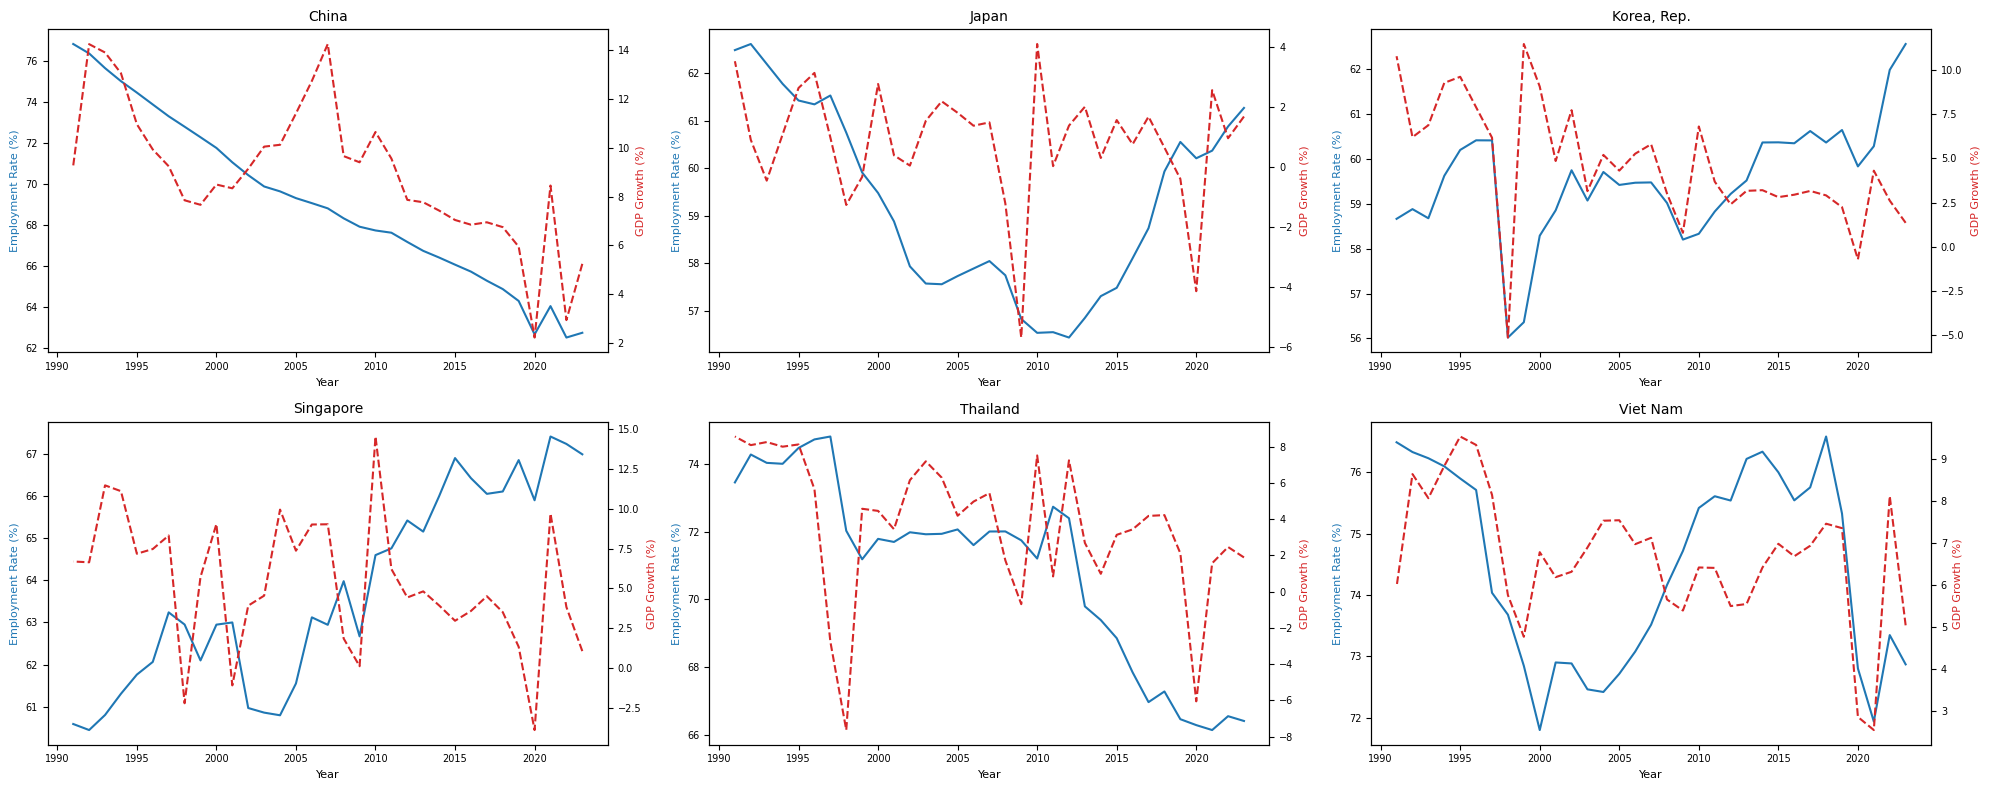

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Users/seanjeon/Downloads/asian_countries.csv')

# List of selected countries
selected_countries = [
    'China', 'Japan', 'Korea, Rep.', 'Singapore', 'Thailand', 'Viet Nam'
]

# Filter
df_selected = df[df['country'].isin(selected_countries)]
df_clean = df_selected.dropna(subset=['employment_population_ratio', 'gdp_growth'])

# Create 2x5 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 8))  # Wide and short figure
axes = axes.flatten()  # Make it easier to loop

# Plot each country
for i, country in enumerate(selected_countries):
    temp = df_clean[df_clean['country'] == country]
    
    ax1 = axes[i]
    ax2 = ax1.twinx()  # Create twin y-axis

    ax1.plot(temp['year'], temp['employment_population_ratio'], color='tab:blue')
    ax2.plot(temp['year'], temp['gdp_growth'], color='tab:red', linestyle='--')

    ax1.set_title(country, fontsize=10)
    ax1.set_xlabel('Year', fontsize=8)
    ax1.set_ylabel('Employment Rate (%)', color='tab:blue', fontsize=8)
    ax2.set_ylabel('GDP Growth (%)', color='tab:red', fontsize=8)
    
    ax1.tick_params(axis='both', labelsize=7)
    ax2.tick_params(axis='y', labelsize=7)

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# 6. Simple regression: GDP Growth ~ Employment Rate
X = df_clean['employment_population_ratio']
y = df_clean['gdp_growth']

# Add constant for intercept
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     36.47
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           7.66e-09
Time:                        18:30:03   Log-Likelihood:                -536.21
No. Observations:                 198   AIC:                             1076.
Df Residuals:                     196   BIC:                             1083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             